# POLYNOMIAL REGRESSION on 1-D dataset

### Modelling a polynomial regression model using sklearn and python on one dimensional dataset

## EXAMPLE-1

#### Importing libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\harsh\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
C:\Users\harsh\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
pos = pd.read_csv('https://s3.us-west-2.amazonaws.com/public.gamelab.fun/dataset/position_salaries.csv')

In [3]:
pos

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


#### Plotting X v/s y

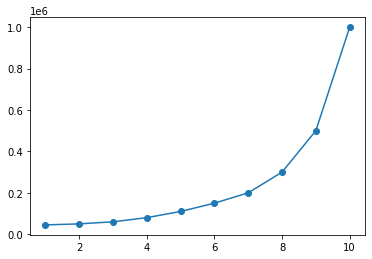

In [4]:
%matplotlib inline

plt.plot(pos['Level'], pos['Salary'], marker='o');

### Using sklearn

#### Splitting dataset into train and test set

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
train_x, test_x, train_y, test_y = train_test_split(pos['Level'], pos.Salary, test_size = 0.2, random_state=42)

In [7]:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(8,)
(2,)
(8,)
(2,)


In [8]:
train_x = train_x.values.reshape((-1, 1))
test_x = test_x.values.reshape((-1, 1))
train_y = train_y.values.reshape((-1, 1))
test_y = test_y.values.reshape((-1, 1))

In [9]:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(8, 1)
(2, 1)
(8, 1)
(2, 1)


### Applying Linear Model to the dataset and plotting graph, looking onto error, r2 score and score

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
model = LinearRegression()

In [12]:
model.fit(train_x, train_y)

LinearRegression()

In [13]:
y_predict = model.predict(test_x)

In [14]:
y_predict

array([[550732.75862069],
       [-64482.75862069]])

In [15]:
test_x

array([[9],
       [2]], dtype=int64)

In [16]:
model.coef_

array([[87887.93103448]])

In [17]:
model.intercept_

array([-240258.62068966])

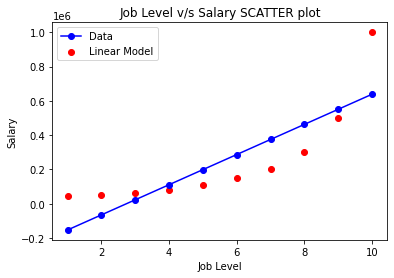

In [18]:
plt.scatter(pos['Level'], pos.Salary, marker='o', color='red')
plt.plot(pos['Level'], model.predict(pos.Level.values.reshape(-1, 1)), marker='o', color='blue')
plt.xlabel('Job Level')
plt.ylabel('Salary')
plt.title('Job Level v/s Salary SCATTER plot')
plt.legend(['Data', 'Linear Model']);

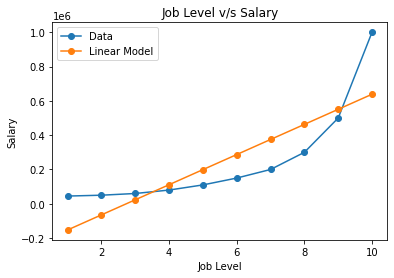

In [19]:
plt.plot(pos['Level'], pos.Salary, marker='o')
plt.plot(pos['Level'], model.predict(pos.Level.values.reshape(-1, 1)), marker='o')
plt.xlabel('Job Level')
plt.ylabel('Salary')
plt.title('Job Level v/s Salary')
plt.legend(['Data', 'Linear Model']);

In [20]:
model.predict(pos.Level.values.reshape(-1, 1))

array([[-152370.68965517],
       [ -64482.75862069],
       [  23405.17241379],
       [ 111293.10344828],
       [ 199181.03448276],
       [ 287068.96551724],
       [ 374956.89655172],
       [ 462844.82758621],
       [ 550732.75862069],
       [ 638620.68965517]])

In [21]:
model.score(pos.Level.values.reshape(-1, 1), pos.Salary.values.reshape(-1, 1))

0.6635126575685747

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
mean_squared_error(test_y, y_predict)

7840057409.334121

In [24]:
r2_score(test_y, y_predict)

0.8451346684575975

In [25]:
X = pos.iloc[:, 1]
y = pos.iloc[:, 2]

In [26]:
print(X.shape)
print(y.shape)

(10,)
(10,)


In [27]:
X = X.values.reshape((-1, 1))
y = y.values.reshape((-1, 1))

print(X.shape)
print(y.shape)

(10, 1)
(10, 1)


## Applying polynomial regression model using sklearn.preprocessing PolynomialFeatures

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

Preparing polynomial dataset of degree 4 using PolynomialFeatures

In [29]:
poly_reg = PolynomialFeatures(degree=4)

In [30]:
X_poly = poly_reg.fit_transform(X)

In [31]:
X_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

#### After getting a new input features of multiple degrees, we model the input using linear regression. 

In [32]:
pol_reg = LinearRegression()

In [33]:
pol_reg.fit(X_poly, y)

LinearRegression()

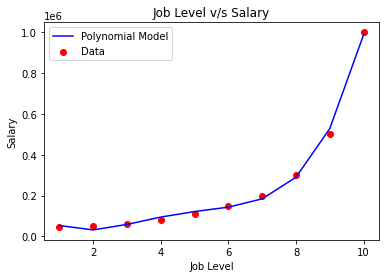

In [34]:
plt.scatter(X, y, marker='o', color='red')
plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
plt.xlabel('Job Level')
plt.ylabel('Salary')
plt.title('Job Level v/s Salary')
plt.legend(['Polynomial Model', 'Data']);

### Applying same model using train test split

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
T_x, t_x, T_y, t_y = train_test_split(poly_reg.fit_transform(X), y, test_size=0.2, random_state=42)

In [37]:
print(T_x.shape)
print(t_x.shape)
print(T_y.shape)
print(t_y.shape)

(8, 5)
(2, 5)
(8, 1)
(2, 1)


In [38]:
pol_model = LinearRegression()

In [39]:
pol_model.fit(T_x, T_y)

LinearRegression()

In [40]:
pol_model.coef_

array([[      0.        , -188149.59288997,   84711.1945469 ,
         -13818.79834549,     806.57593376]])

In [41]:
pol_model.intercept_

array([162437.01550388])

In [42]:
pred_y = pol_model.predict(t_x)

In [43]:
pred_y

array([[548738.1453076 ],
       [ 27337.43608775]])

In [44]:
t_y

array([[500000],
       [ 50000]], dtype=int64)

Calculating mse, r2_score and score


Plotting predictions

In [45]:
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
mean_squared_error(t_y, pred_y)

1444499305.5506434

In [47]:
r2_score(t_y, pred_y)

0.9714666803841848

In [48]:
t_x

array([[1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01]])

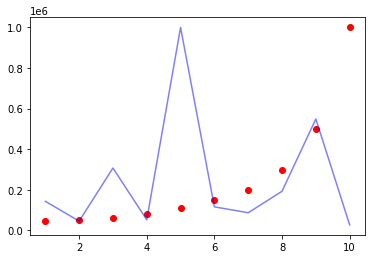

In [49]:
plt.scatter(X, y, color='red')
X_full = np.concatenate([T_x.T, t_x.T], axis=1)
plt.plot(X, pol_model.predict(X_full.T), color='blue', alpha=0.5);

In [50]:
pol_model.score(t_x, t_y)

0.9714666803841848

In [51]:
pol_model.score(X_full.T, y)

-1.2758262510565732

## EXAMPLE-2

#### Using sklearn

Preparing dataset

In [52]:
np.random.seed(42)
X = np.random.rand(1000, 1)
y = 5*((X)**2) + np.random.rand(1000, 1)

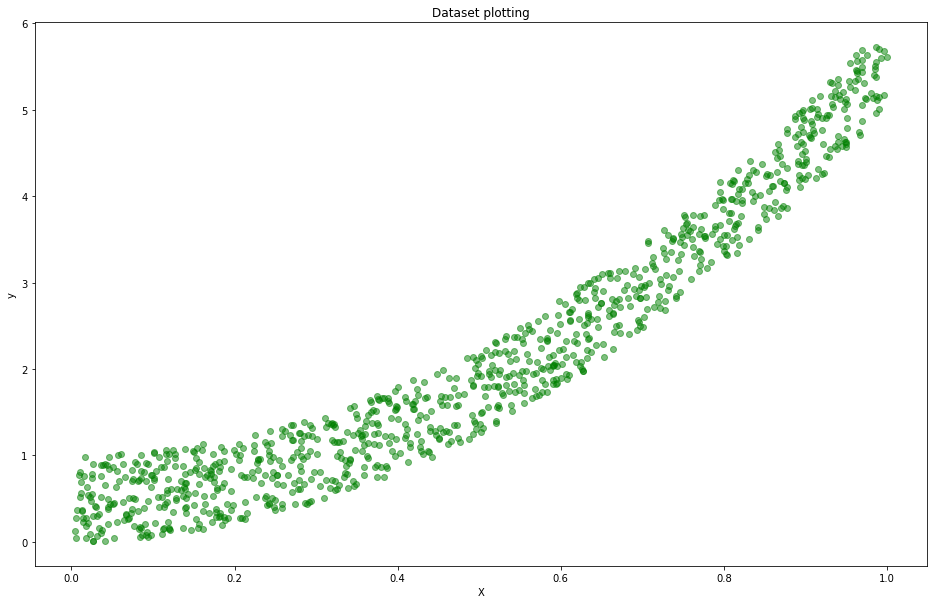

In [53]:
plt.figure(figsize=(16, 10))
plt.scatter(X, y, marker='o', color='green', alpha=0.5)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Dataset plotting");

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

(800, 1)
(200, 1)
(800, 1)
(200, 1)


### Type-1

Using linear regression for plotting

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
l_model = LinearRegression()

In [59]:
l_model.fit(train_X, train_y)

LinearRegression()

In [60]:
y_pred = l_model.predict(test_X)

In [61]:
from sklearn.metrics import mean_squared_error, r2_score

In [62]:
mean_squared_error(test_y, y_pred)

0.21009594813473056

In [63]:
r2_score(test_y, y_pred)

0.9009946461049024

In [64]:
l_model.score(test_X, test_y)

0.9009946461049024

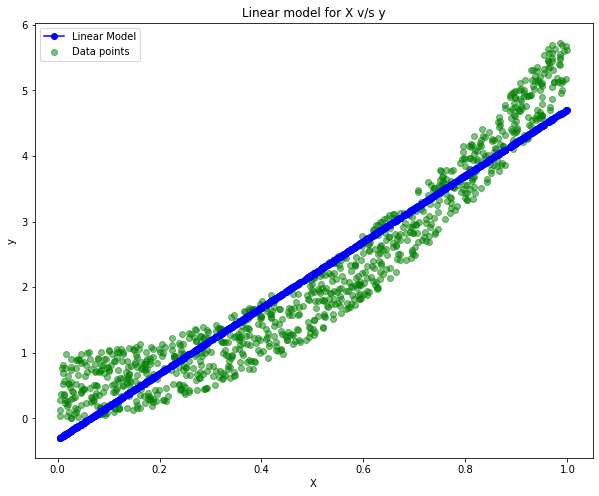

In [65]:
plt.figure(figsize=(10, 8))
plt.scatter(X, y, marker='o', color='green', alpha=0.5)
plt.plot(X, l_model.predict(X), marker='o', color='blue')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear model for X v/s y")
plt.legend(['Linear Model', 'Data points'])

### TYPE-2

Using Polynomial Regression model

In [66]:
from sklearn.preprocessing import PolynomialFeatures

In [67]:
poly_reg = PolynomialFeatures(degree=2)

In [68]:
X_poly = poly_reg.fit_transform(X)

In [69]:
X_poly

array([[1.        , 0.37454012, 0.1402803 ],
       [1.        , 0.95071431, 0.90385769],
       [1.        , 0.73199394, 0.53581513],
       ...,
       [1.        , 0.13681863, 0.01871934],
       [1.        , 0.95023735, 0.90295103],
       [1.        , 0.44600577, 0.19892115]])

In [70]:
train_x, test_x, train_y, test_y = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [71]:
pol_model = LinearRegression()

In [72]:
pol_model.fit(X_poly, y)

LinearRegression()

In [73]:
predY = pol_model.predict(X_poly)

## Plotting 

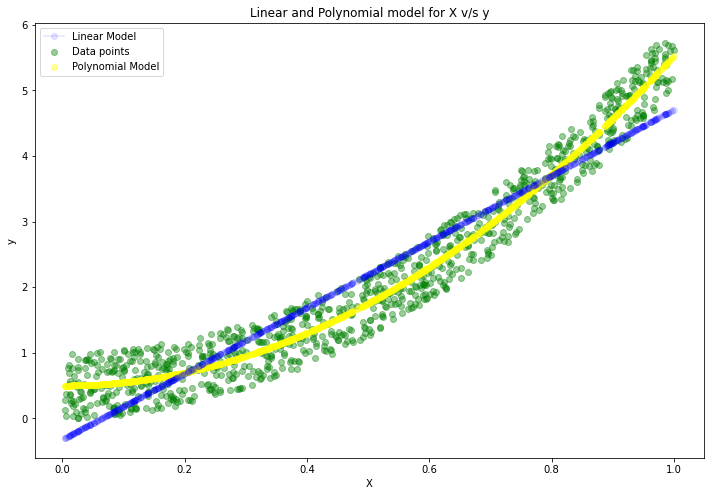

In [74]:
plt.figure(figsize=(12, 8))
plt.scatter(X, y, marker='o', color='green', alpha=0.4)
plt.plot(X, l_model.predict(X), marker='o', color='blue', alpha=0.1)
plt.scatter(X, predY, marker='o', color='yellow', alpha=0.4)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear and Polynomial model for X v/s y")
plt.legend(['Linear Model', 'Data points', 'Polynomial Model']);

In [75]:
pol_model_2 = LinearRegression()

In [76]:
pol_model_2.fit(train_x, train_y)

LinearRegression()

In [77]:
predsTest = pol_model_2.predict(test_x)

In [78]:
mean_squared_error(test_y, predsTest)

0.08721834344117241

In [79]:
r2_score(test_y, predsTest)

0.9588993360643018

In [80]:
pol_model_2.coef_

array([[ 0.        , -0.14133929,  5.17325728]])

In [81]:
pol_model_2.intercept_

array([0.52709653])

In [82]:
pol_model_2.score(test_x, test_y)

0.9588993360643018

## Using PYTHON

### Defining various functions 

- Functions for calculting cost, gradients, parameters and for updating parameters

In [83]:
def parameters_initialization(n_x, m):
    parameters = {}
    
    parameters['w'] = np.random.randn(1, n_x)*np.sqrt(1/n_x)
    parameters['b'] = np.zeros((1, 1))
    
    return parameters

def compute_cost(y_hat, y):
    m = y.shape[1]
    
    return (1/(2*m))*np.sum(np.square(y_hat - y))

def compute_gradients(X, y, y_hat):
    m = X.shape[1]
    grads = {}
    
    dZ = y_hat - y
    grads['dw'] = (1/m)*np.dot(dZ, X.T)
    grads['db'] = (1/m)*np.sum(dZ)
    
    return grads

def update_parameters(parameters, gradients, learning_rate):
    parameters['w'] -= learning_rate*gradients['dw']
    parameters['b'] -= learning_rate*gradients['db']
    
    return parameters

#### Function for making model and Gradient descent process

In [84]:
def model(X, y, num_iterations, learning_rate):
    n_x = X.shape[0]
    m = X.shape[1]
    costs = []
    
    parameters = parameters_initialization(n_x, m)
    for i in range(num_iterations):
        y_hat = np.dot(parameters['w'], X) + parameters['b']
        cost = compute_cost(y_hat, y)
        gradients = compute_gradients(X, y, y_hat)
        parameters = update_parameters(parameters, gradients, learning_rate)
        
        if i%1000 == 0:
            costs.append(cost)
            print(f"Cost after interation {i} is:", cost)
            
    plt.plot(costs)
    plt.xlabel("Num iterations")
    plt.ylabel("Costs")
    plt.title("Num iterations v/s cost")
    plt.show()
    
    return parameters

#### Transform of input set to polynomial powers set

In [85]:
def x_transform(X, degrees):
    t = X.copy()
    
    for i in range(2, degrees+1):
        X = np.concatenate([X, t**i], axis=1)
        
    return X

In [86]:
def predict(X, y, parameters):
    y_predict = np.dot(parameters['w'], X) + parameters['b']
    cost = compute_cost(y_predict, y)
    
    return y_predict, cost

#### Functions for mean squared error and r2 score calculations

In [87]:
def ms_error(t_y, p_y):
    return np.mean(np.sum(np.square(p_y - t_y)))
    
def r2Score(t_y, p_y):
    y_mean = np.mean(t_y)
    return 1 - (np.sum(np.square(t_y - p_y))/np.sum(np.square(t_y - y_mean)))

#### Polynomial regression function

In [88]:
def PolynomialRegression(train_x, test_x, train_y, test_y, num_iterations=7500, learning_rate=0.01):
    parameters = model(train_x, train_y, num_iterations, learning_rate)
    print("Coef:", parameters['w'])
    print("Intercept:", parameters['b'])
    
    test_predict, test_cost = predict(test_x, test_y, parameters)
    print("Cost on test set:", test_cost)
    
    print("Mean squared_error:", ms_error(test_y, test_predict))
    print("r2_score:", r2Score(test_y, test_predict))
    
    X = np.concatenate([train_x, test_x], axis=1)
    y = np.concatenate([train_y, test_y], axis=1)
    prediction, cost = predict(X, y, parameters)
    
    return parameters, prediction

#### Train test split functions

In [89]:
def shuffle(X, y):
    m = X.shape[0]
    
    perms = np.random.permutation(m)
    X = X[perms]
    y = y[perms]
    return X, y

def input_set_split(X, y, test_ratio):
    import math
    m = X.shape[0]
    X_shuffled, y_shuffled = shuffle(X, y)
    
    train_size = math.ceil(m*(1-test_ratio))
    train_x = X_shuffled[:train_size, :]
    train_y = y_shuffled[:train_size, :]
    test_x = X_shuffled[train_size:, :]
    test_y = y_shuffled[train_size:, :]
    
    return train_x, test_x, train_y, test_y

#### Dataset preparation

In [90]:
np.random.seed(42)
X = np.random.rand(1000, 1)
y = 5*((X)**2) + np.random.rand(1000, 1)

In [91]:
print(X.shape)
print(y.shape)

(1000, 1)
(1000, 1)


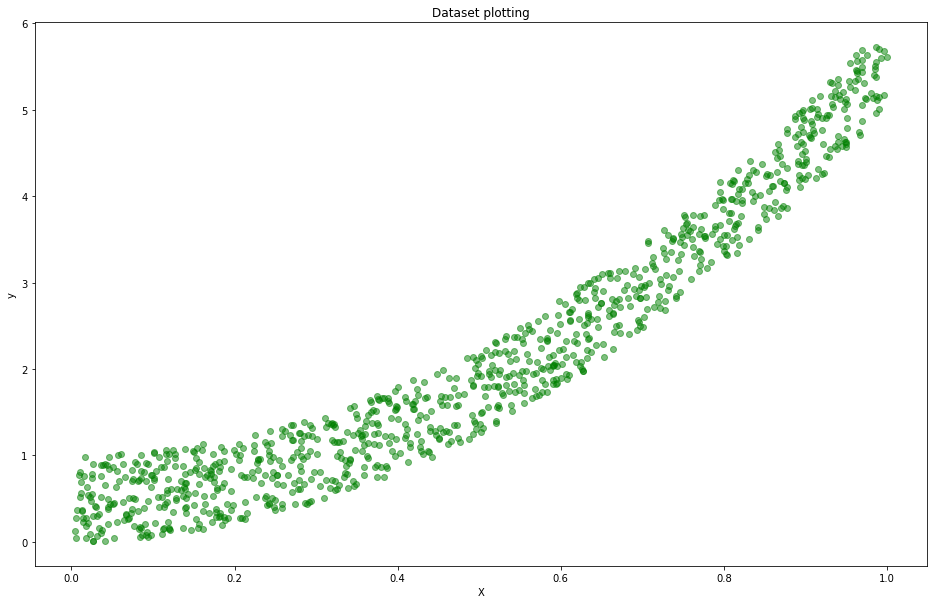

In [92]:
plt.figure(figsize=(16, 10))
plt.scatter(X, y, marker='o', color='green', alpha=0.5)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Dataset plotting");

In [93]:
X_poly = x_transform(X, degrees=3)

In [94]:
X_poly

array([[0.37454012, 0.1402803 , 0.0525406 ],
       [0.95071431, 0.90385769, 0.85931044],
       [0.73199394, 0.53581513, 0.39221343],
       ...,
       [0.13681863, 0.01871934, 0.00256115],
       [0.95023735, 0.90295103, 0.8580178 ],
       [0.44600577, 0.19892115, 0.08871998]])

In [95]:
print(X_poly.shape)

(1000, 3)


In [96]:
train_x, test_x, train_y, test_y = input_set_split(X_poly, y, test_ratio=0.2)

In [97]:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(800, 3)
(200, 3)
(800, 1)
(200, 1)


In [98]:
train_x = train_x.T
test_x = test_x.T
train_y = train_y.T
test_y = test_y.T

In [99]:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(3, 800)
(3, 200)
(1, 800)
(1, 200)


Cost after interation 0 is: 4.670591466258174
Cost after interation 1000 is: 0.06143207782112004
Cost after interation 2000 is: 0.04519137207188715
Cost after interation 3000 is: 0.044529849988918326
Cost after interation 4000 is: 0.04441147107196931
Cost after interation 5000 is: 0.04432366358320824
Cost after interation 6000 is: 0.04424747626862352
Cost after interation 7000 is: 0.044180922520644525


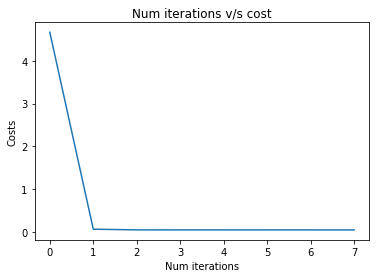

Coef: [[0.90379969 2.11757825 2.22450259]]
Intercept: [[0.46483706]]
Cost on test set: 0.04038522362413585
Mean squared_error: 16.15408944965434
r2_score: 0.9676895640222043


In [100]:
parameters, predictions = PolynomialRegression(train_x, test_x, train_y, test_y)

In [101]:
print(parameters)

{'w': array([[0.90379969, 2.11757825, 2.22450259]]), 'b': array([[0.46483706]])}


### PLOTTING

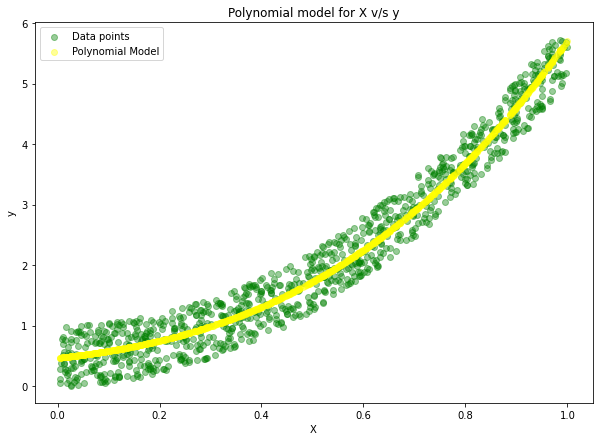

In [102]:
plt.figure(figsize=(10, 7))
plt.scatter(X, y, marker='o', color='green', alpha=0.4)
pred_y, cst = predict(X_poly.T, y.T, parameters)
plt.scatter(X, pred_y, marker='o', color='yellow', alpha=0.4)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Polynomial model for X v/s y")
plt.legend(['Data points', 'Polynomial Model']);

In [103]:
mean_squared_error(y.T, pred_y)

0.08679547075010298

In [104]:
r2_score(y, pred_y.T)

0.9630537115203833